In [10]:
import json
import itertools  # itertools.combinations may be useful
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [11]:
def load_json(input):
    # Opening JSON file
    f = open(input)
    # returns JSON object as
    # a dictionary
    data = json.load(f)
    # Closing file
    f.close() 
    return data

In [12]:
def get_cn(key,input):
    data = load_json(input)
    for i,el in enumerate(data["intervals"]):
        if el['iid']==key:
            return el['y']
        else:
            continue

In [13]:
def draw_network(G):
    # Set overall figure size
    fig = plt.figure(figsize=(40,40))
    fig.tight_layout()

    nx.draw_networkx(G)

In [14]:
def draw_network_colors(G):
    input = 'SM12_12.json'
    node_list = list(G.nodes())
    cn = []
    for node in node_list:
        cn.append(get_cn(node,input))

    # df = pd.DataFrame({'nodes':node_list,'copy_number':cn})
    # print(df)

    #nx.set_node_attributes(G, cn, 'cn')

    fig = plt.figure(figsize=(20,15))

    #cmap = plt.cm.get_cmap('rainbow')
    cmap = plt.cm.coolwarm
    vmin = 0
    vmax = max(cn)
    nx.draw(G, pos=nx.spring_layout(G), node_color = cn, vmin=vmin, vmax=vmax, cmap=cmap,with_labels=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm,fraction=0.046, pad=0.04, aspect=10)#https://matplotlib.org/stable/api/colorbar_api.html

In [22]:
def find_longest_chain(G,input):
    diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
    print("the longest is", diameter)

    G2=nx.DiGraph()

    how_many_longest = 0

    for (i,j) in nx.shortest_path_length(G):
        if max(j.values()) == diameter:
            #print(j)
            how_many_longest += 1
            node_list = list(j.keys())
            # print(node_list)
            # print(list(zip(*(iter(node_list),) * 2))) # not working!
            for n,node in enumerate(node_list):
                if n+1 == len(node_list)-1:
                    break
                # print("node",node)
                # print(get_cn(node,input))
                G2.add_node(node_list[n])
                G2.add_edge(node_list[n],node_list[n+1])
    print("how_many_longest",how_many_longest)

    return G2

In [16]:
def make_nodes(input):
    data = load_json(input)
    # Iterating through the json
    # list
    _nodegroups = []
    for i,el in enumerate(data["connections"]):
        if el['type']!='LOOSE':
            _nodegroups.append([el['source'],el['sink']])
        else:
            _nodegroups.append([el['source']])

    return _nodegroups

In [17]:
def make_graph(input):

    _nodegroups = make_nodes(input)

    G=nx.DiGraph()

    for node in _nodegroups:
        # node = [source,sink]
        if len(node)>1:
            G.add_edge(abs(node[0]),abs(node[1])) # no info of connection to its left or right
        else:
            G.add_node(abs(node[0]))

    return G

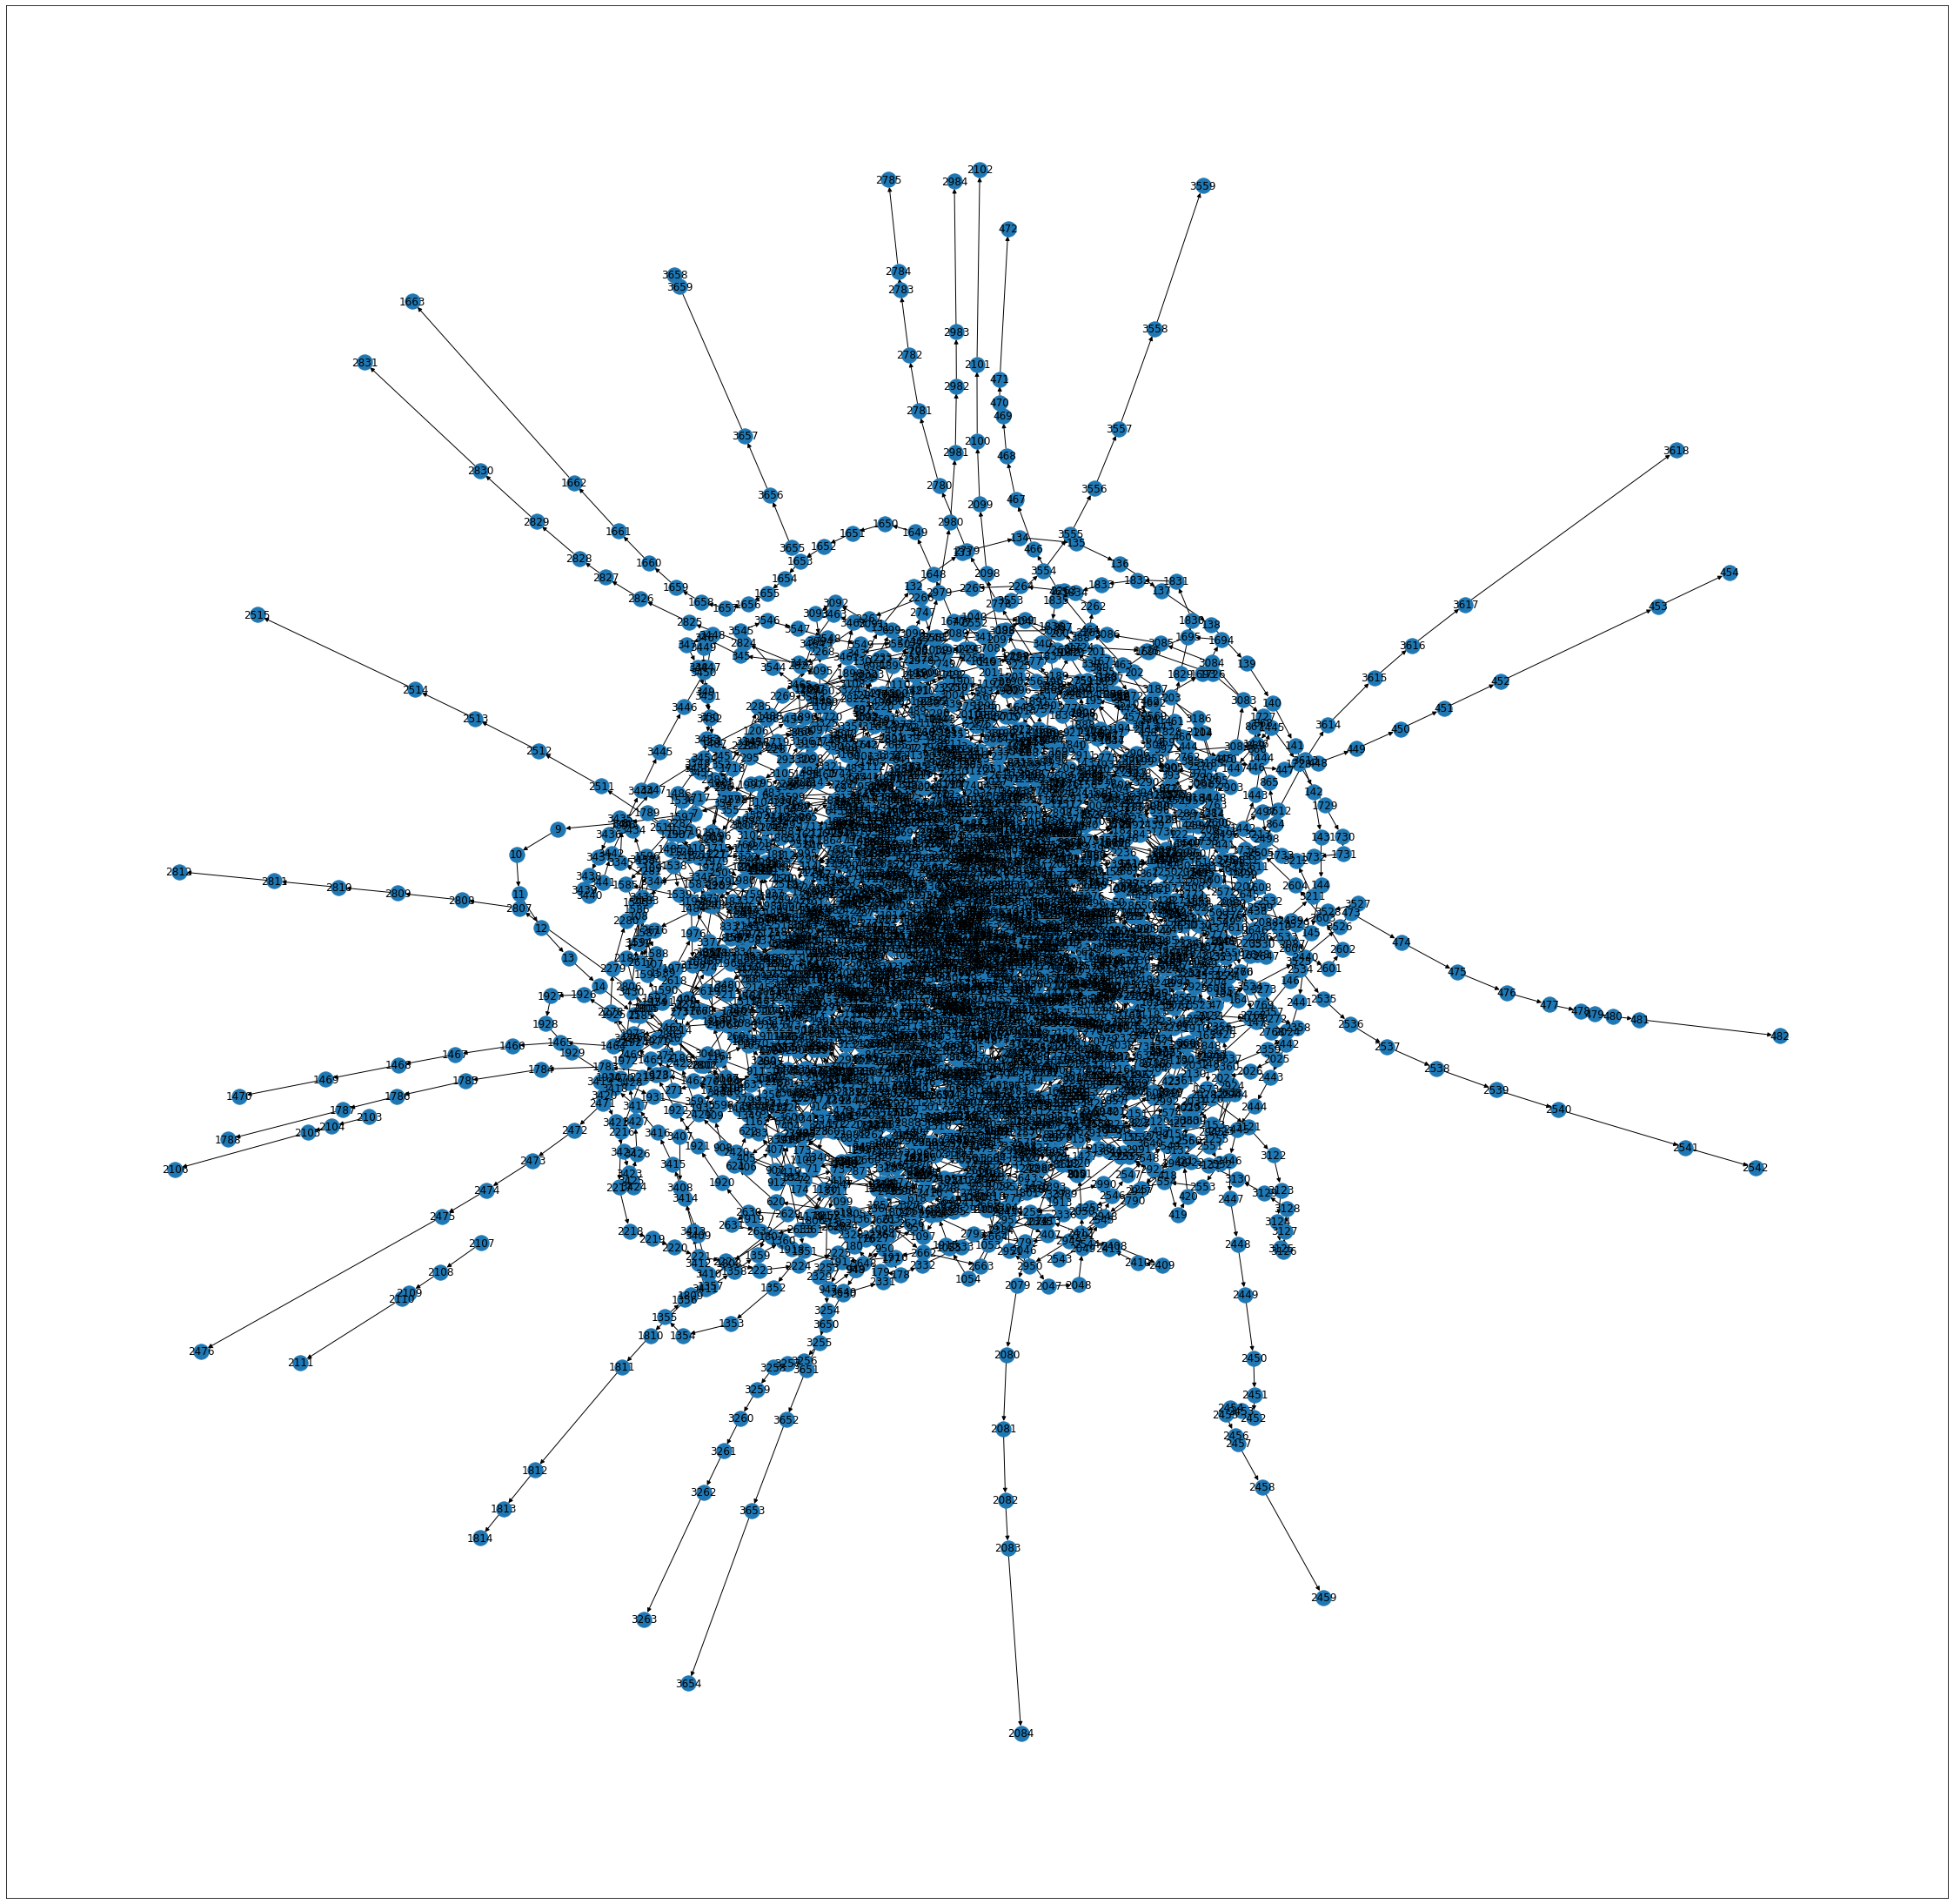

In [18]:
_graph = make_graph('SM12_12.json')
draw_network(_graph)

the longest is 453
how_many_longest 1


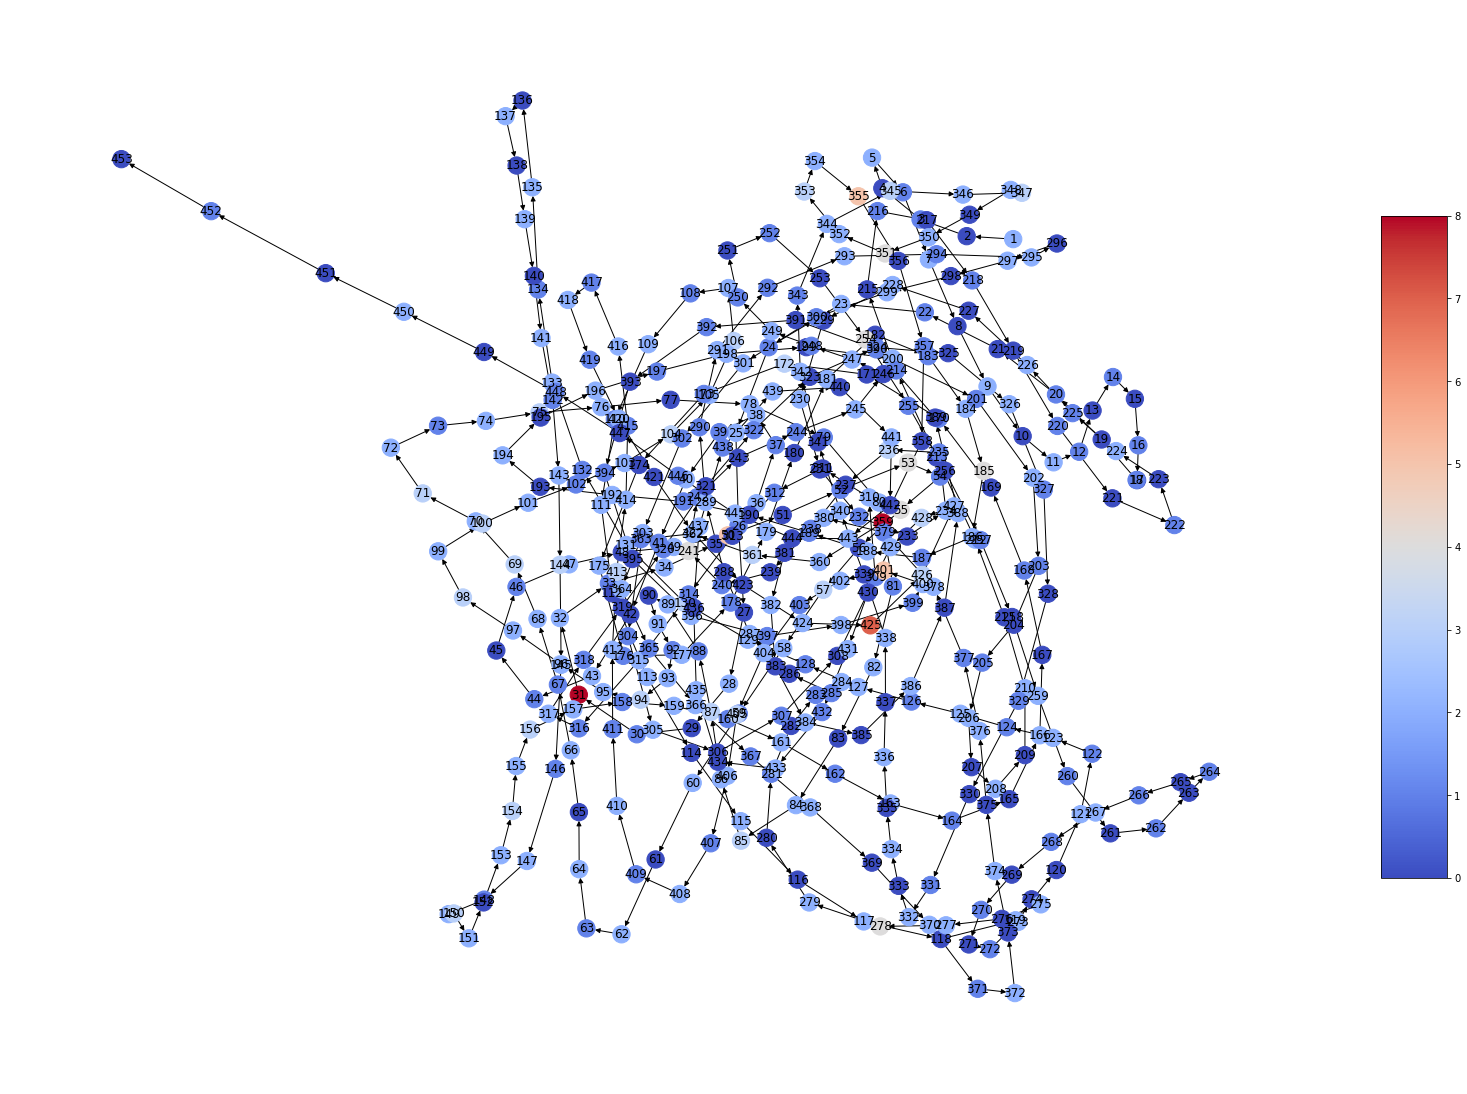

In [23]:
longest_graph = find_longest_chain(_graph,'SM12_12.json')
draw_network_colors(longest_graph)